In [3]:
from pathlib import Path
import xarray as xr
import numpy as np
import pandas as pd
from tabularbench.core.enums import BenchmarkOrigin
from tabularbench.results.ranking_table import make_ranking_table_, process_benchmark_results, process_sweep_results
from tabularbench.results.results_sweep import ResultsSweep
from tabularbench.config.config_benchmark_sweep import ConfigBenchmarkSweep

cfg_general = ConfigBenchmarkSweep.load(Path("outputs_done/whytrees_tabpfn_orig_finetune/tabpfn-default-categorical_classification/config_benchmark_sweep.yaml"))

models = [
    ("TabPFN (original) Zeroshot", Path("outputs_done/whytrees_tabpfn_orig_zeroshot/tabpfn-default-categorical_classification")),
    ("TabPFN (original) Finetune", Path("outputs_done/whytrees_tabpfn_orig_finetune/tabpfn-default-categorical_classification")),
    ("TabPFN (retrained) Zeroshot", Path("outputs_done/whytrees_tabpfn_foun_zeroshot/foundation-default-categorical_classification")),
    ("TabPFN (retrained) Finetune", Path("outputs_done/whytrees_tabpfn_foun_finetune/foundation-default-categorical_classification")),
    ("TabForest Zeroshot", Path("outputs_done/whytrees_tabsgfd_zeroshot/foundation-default-categorical_classification")),
    ("TabForest Finetune", Path("outputs_done/whytrees_tabsgfd_finetune/foundation-default-categorical_classification")),
    ("TabForestPFN Zeroshot", Path("outputs_done/foundation_mix_600k_zeroshot/foundation-default-categorical_classification")),
    ("TabForestPFN Finetune", Path("outputs_done/foundation_mix_600k_finetune/test_categorical_classification")),
]

models_numerical = [
    ("TabPFN (original) Zeroshot", Path("outputs_done/whytrees_tabpfn_orig_zeroshot/tabpfn-default-numerical_classification")),
    ("TabPFN (original) Finetune", Path("outputs_done/whytrees_tabpfn_orig_finetune/tabpfn-default-numerical_classification")),
    ("TabPFN (retrained) Zeroshot", Path("outputs_done/whytrees_tabpfn_foun_zeroshot/foundation-default-numerical_classification")),
    ("TabPFN (retrained) Finetune", Path("outputs_done/whytrees_tabpfn_foun_finetune/foundation-default-numerical_classification")),
    ("TabForest Zeroshot", Path("outputs_done/whytrees_tabsgfd_zeroshot/foundation-default-numerical_classification")),
    ("TabForest Finetune", Path("outputs_done/whytrees_tabsgfd_finetune/foundation-default-numerical_classification")),
    ("TabForestPFN Zeroshot", Path("outputs_done/foundation_mix_600k_zeroshot/foundation-default-numerical_classification")),
    ("TabForestPFN Finetune", Path("outputs_done/foundation_mix_600k_finetune/test_numerical_classification")),
]

accuracy_categorical = {}

for model_name, model_path in models:
    arr = np.load(model_path / "dataset_plot_combined.npy")
    accuracy_categorical[model_name] = arr[0, -1, 0]

accuracy_numerical = {}

for model_name, model_path in models_numerical:
    arr = np.load(model_path / "dataset_plot_combined.npy")
    accuracy_numerical[model_name] = arr[0, -1, 0]

# rows are models, columns are categorical/numerical, data are above accuracies
df = pd.DataFrame([accuracy_categorical, accuracy_numerical], index=["Categorical", "Numerical"]).T
df.round(3)

,Categorical,Numerical
TabPFN (original) Zeroshot,0.530,0.587
TabPFN (original) Finetune,0.716,0.738
TabPFN (retrained) Zeroshot,0.207,0.351
TabPFN (retrained) Finetune,0.731,0.750
TabForest Zeroshot,0.208,0.350
TabForest Finetune,0.829,0.804
TabForestPFN Zeroshot,0.402,0.570
TabForestPFN Finetune,0.848,0.835


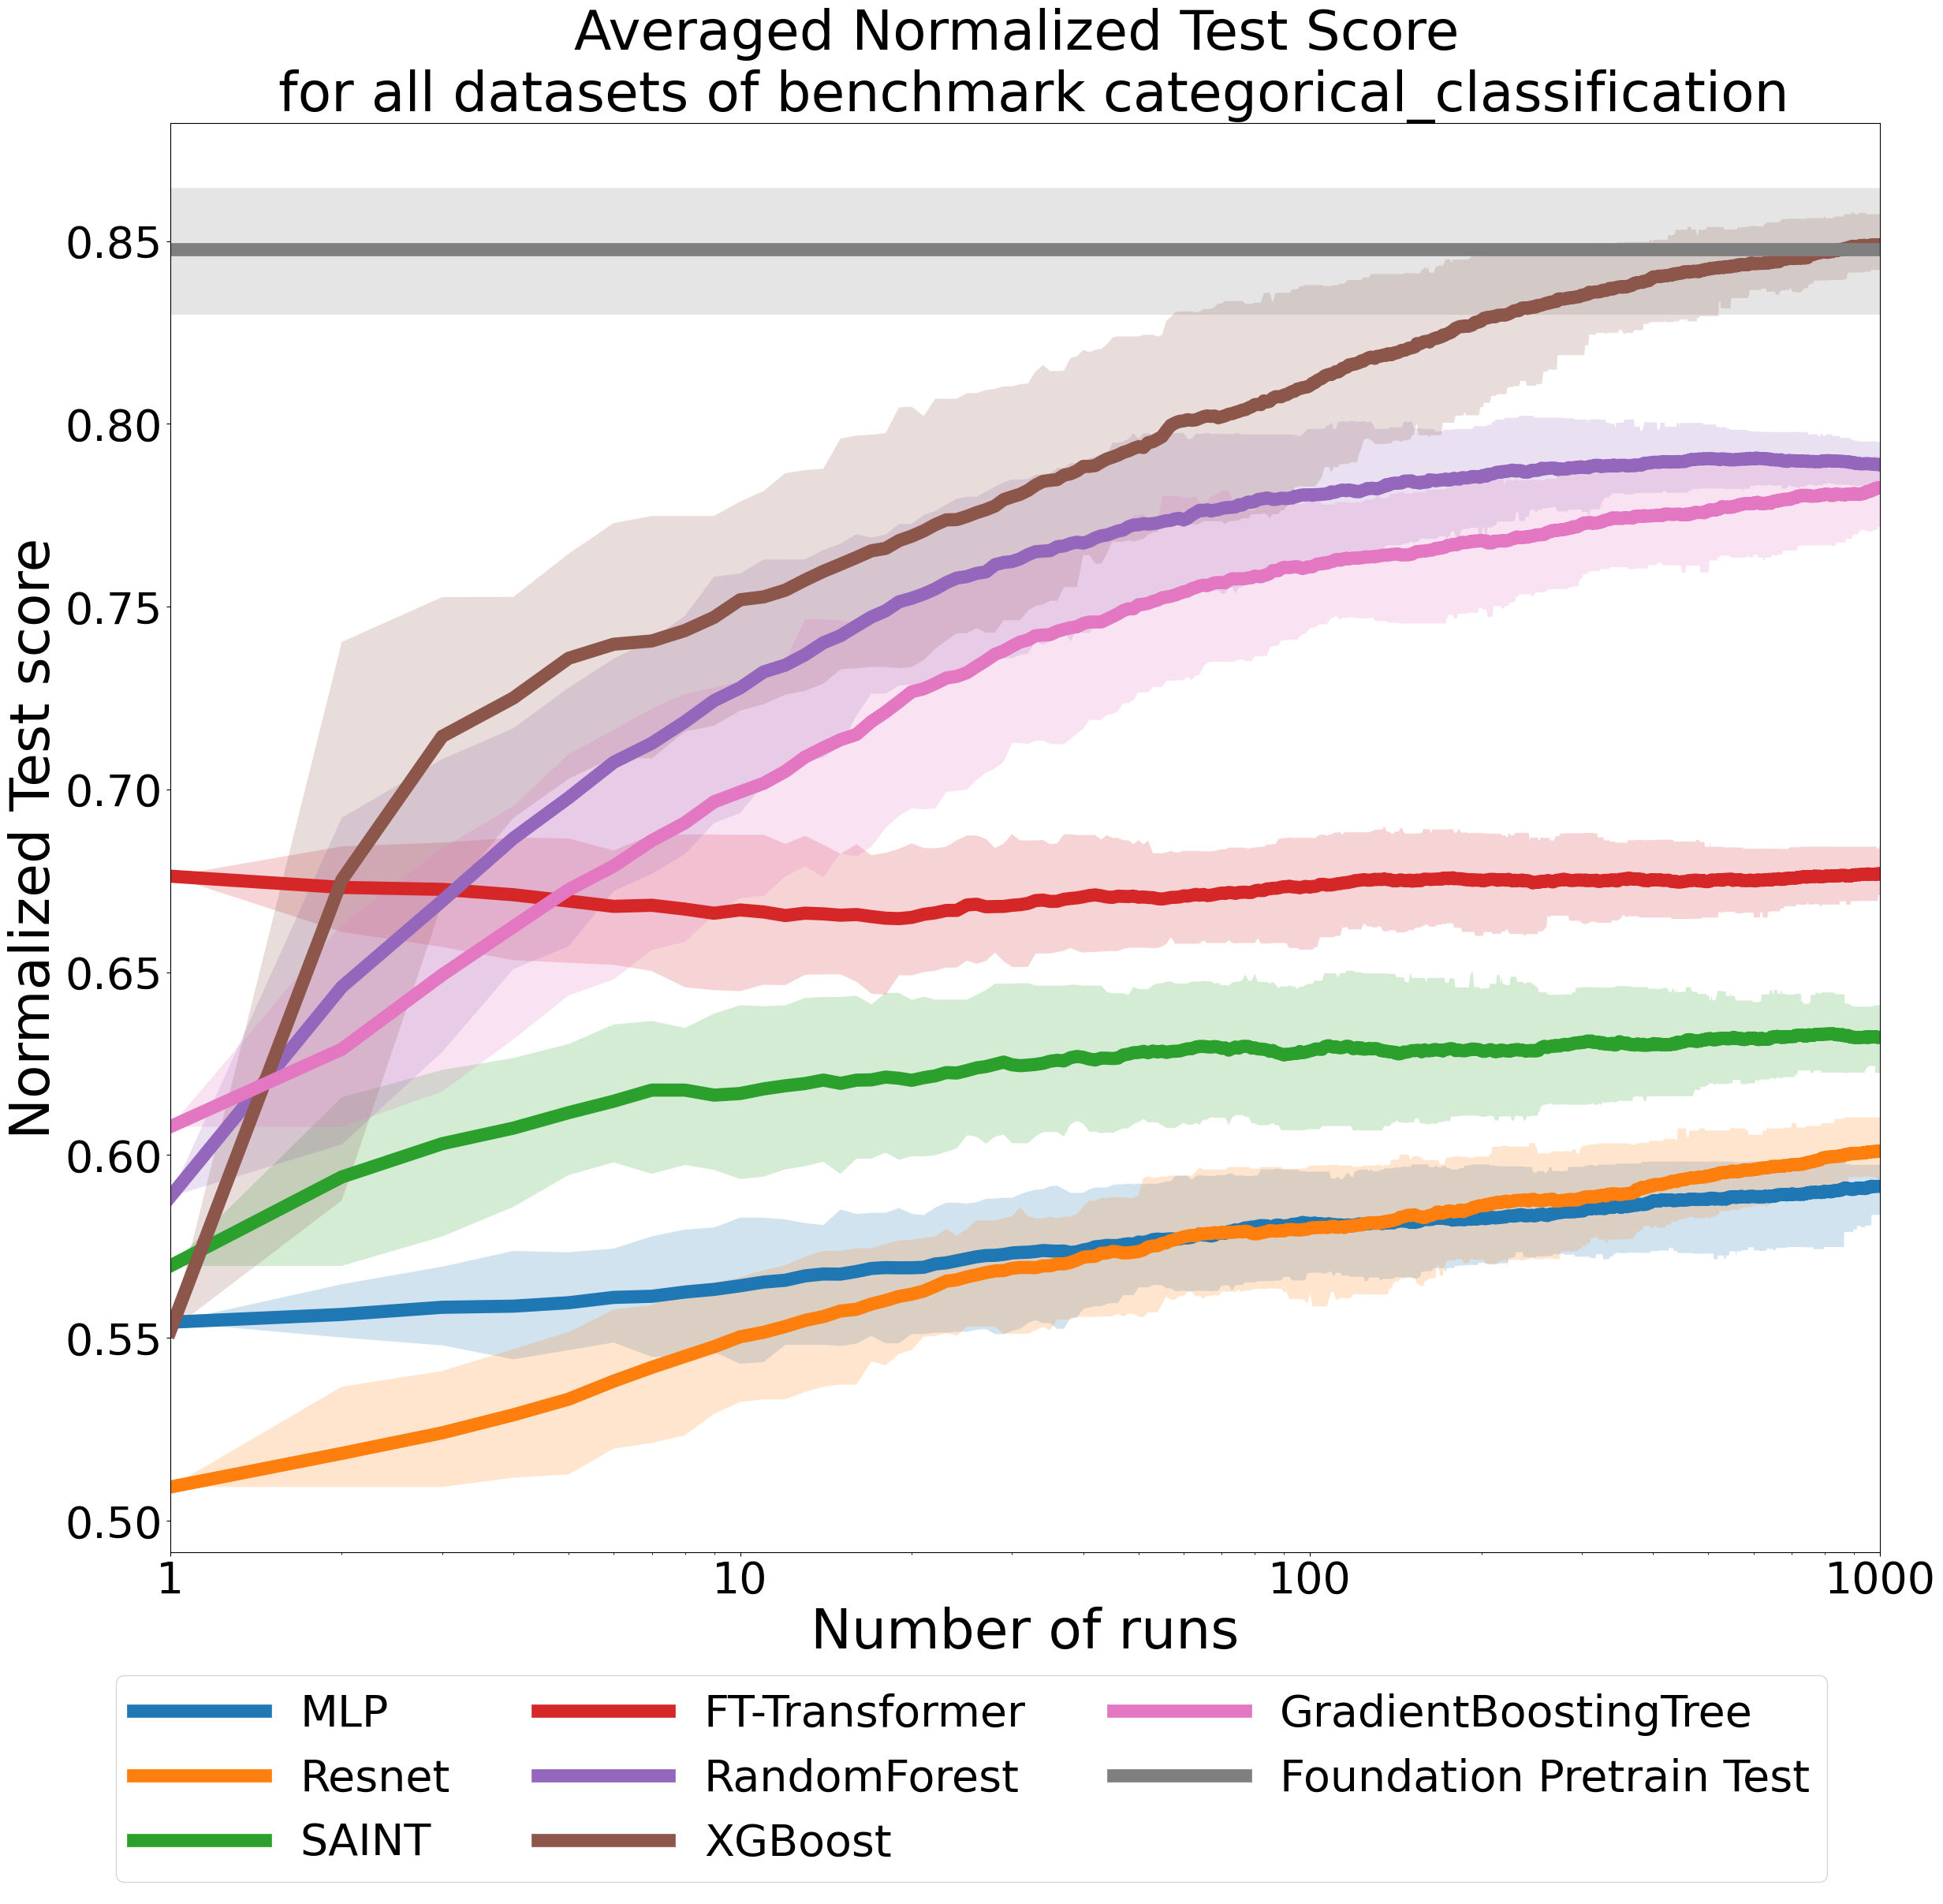

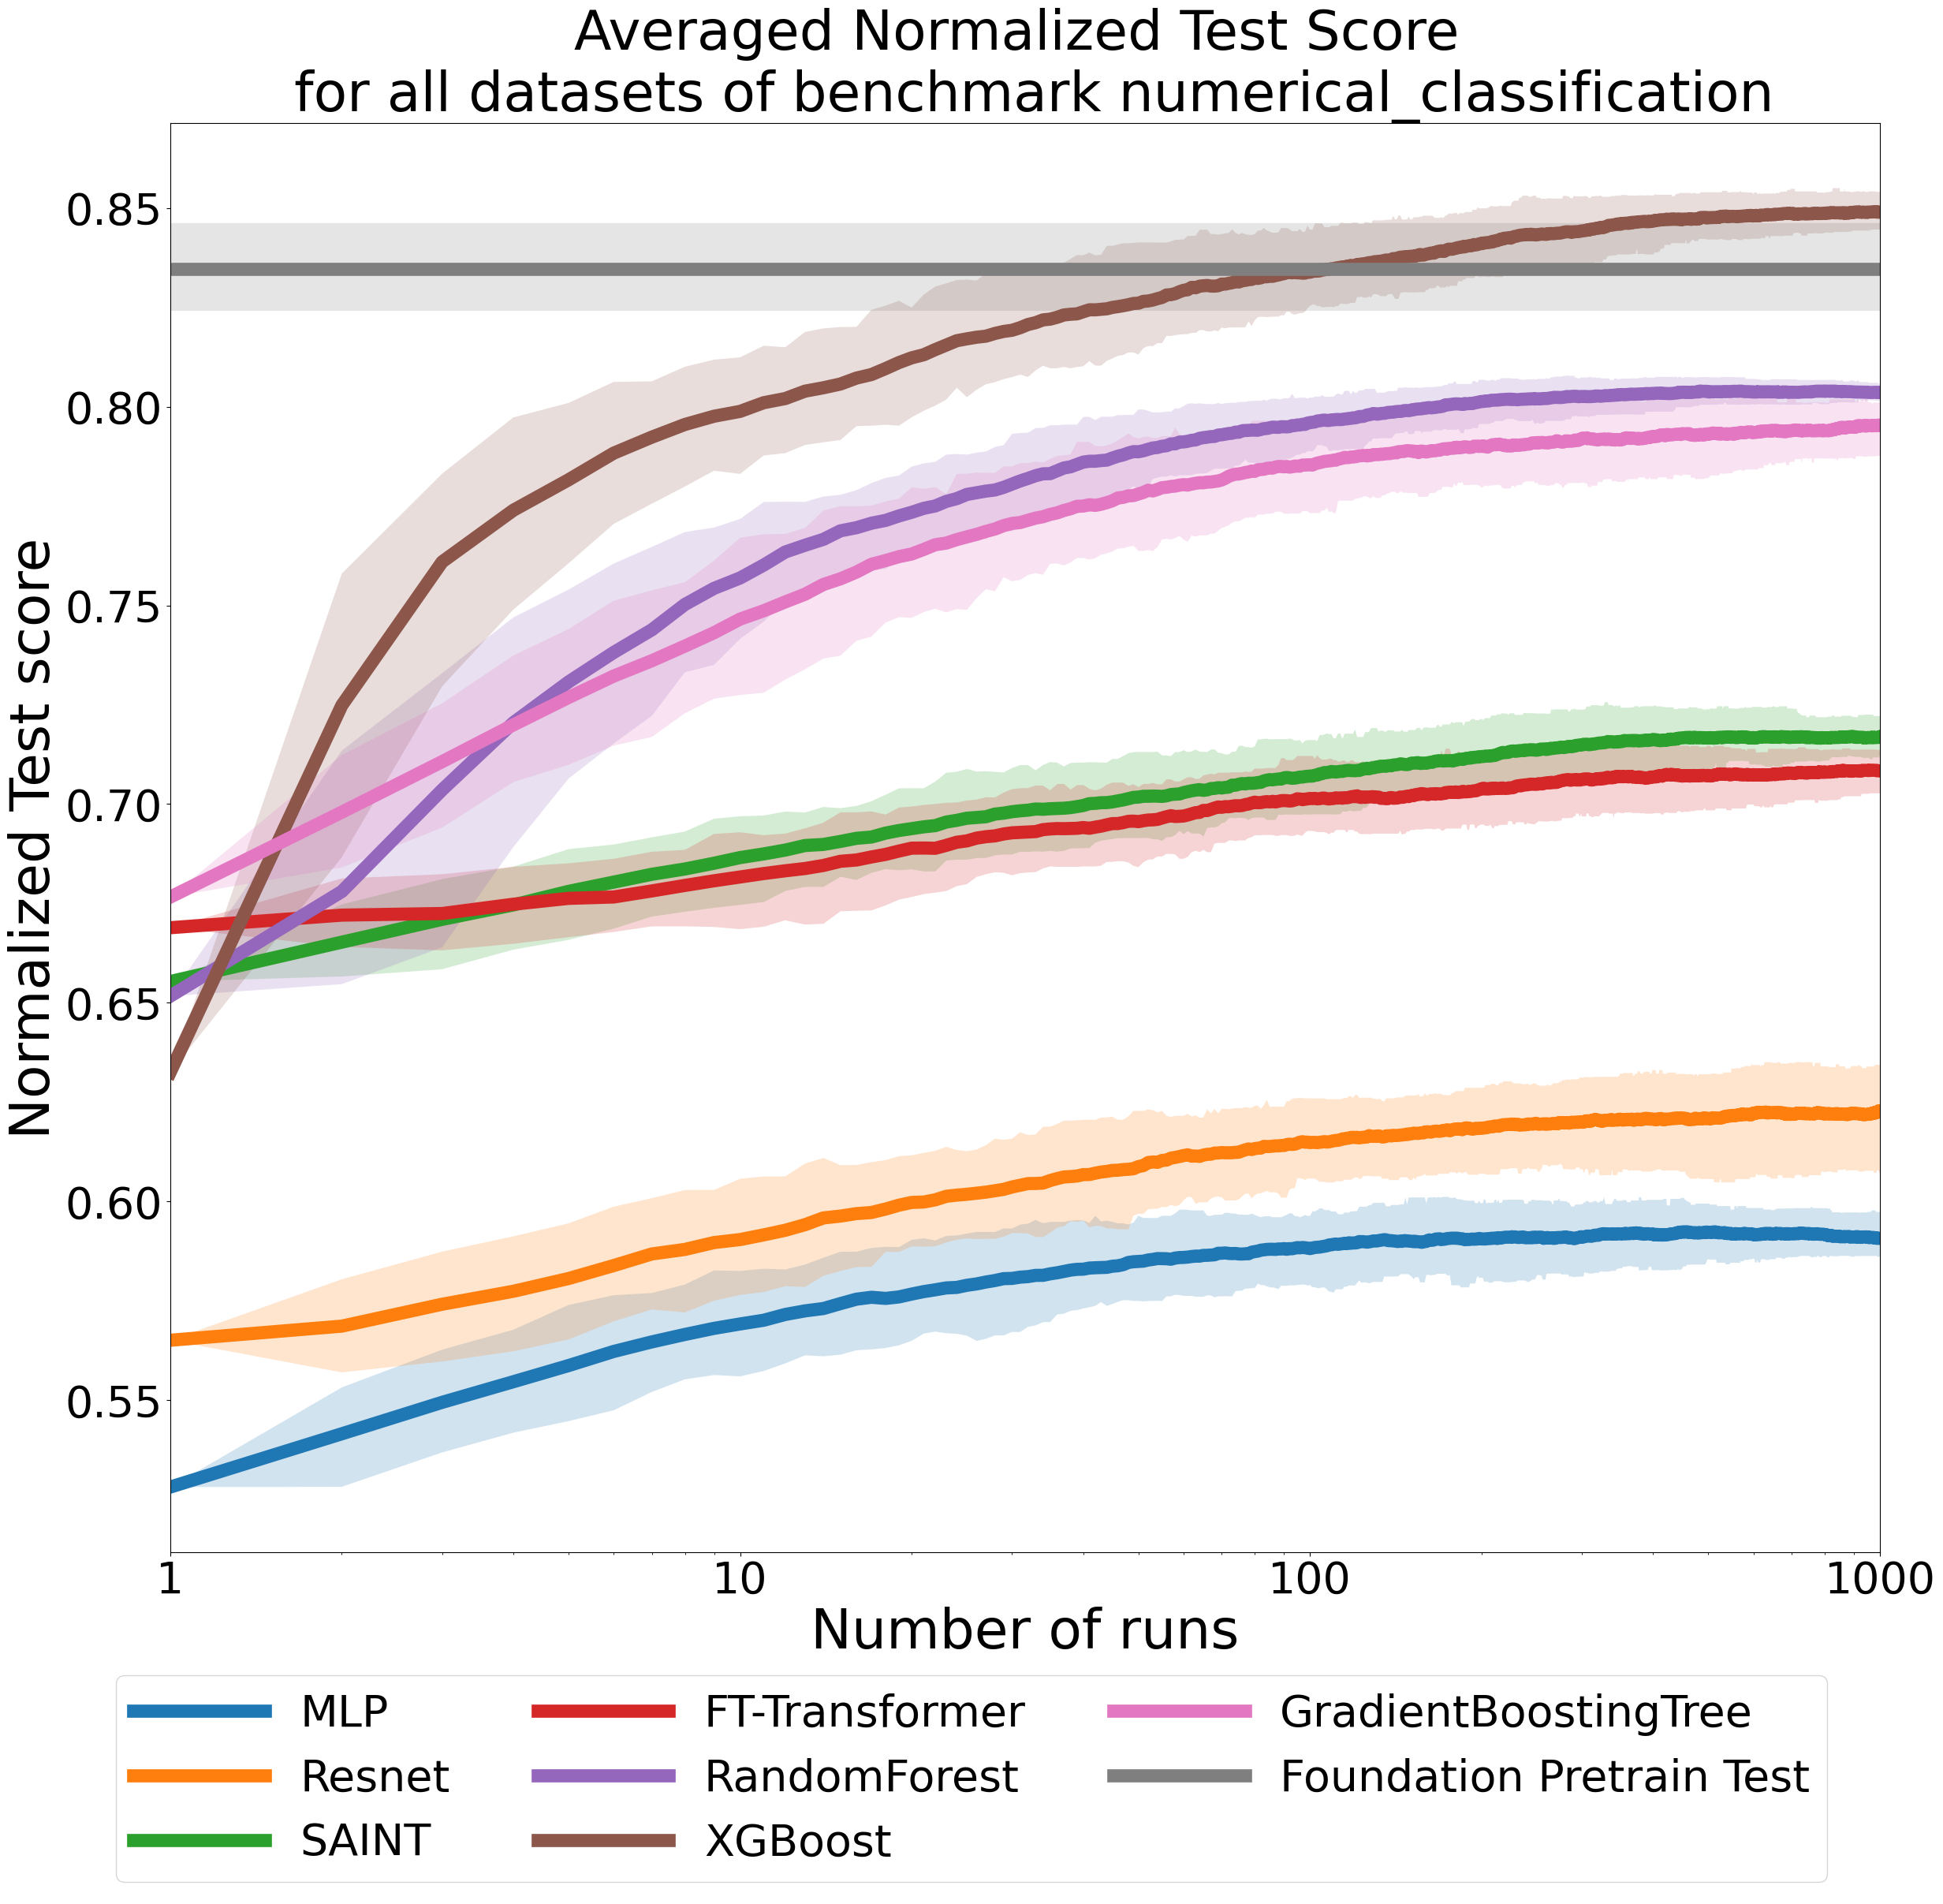

In [8]:
from tabularbench.results.dataset_plot_combined import make_combined_dataset_plot

cfg_categorical = ConfigBenchmarkSweep.load(Path("outputs_done/foundation_mix_600k_finetune/test_categorical_classification/config_benchmark_sweep.yaml"))
dataset_plot_combined_categorical = np.load('outputs_done/foundation_mix_600k_finetune/test_categorical_classification/dataset_plot_combined.npy')
fig_categorical = make_combined_dataset_plot(cfg_categorical, dataset_plot_combined_categorical)


cfg_numerical = ConfigBenchmarkSweep.load(Path("outputs_done/foundation_mix_600k_finetune/test_numerical_classification/config_benchmark_sweep.yaml"))
dataset_plot_combined_numerical = np.load('outputs_done/foundation_mix_600k_finetune/test_numerical_classification/dataset_plot_combined.npy')
fig_numerical = make_combined_dataset_plot(cfg_numerical, dataset_plot_combined_numerical)




In [ ]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(25, 25))

models = cfg_categorical.plotting.whytrees.benchmark_model_names + [cfg_categorical.model_plot_name]

for model_i, model in enumerate(models):

    sequence_mean = dataset_plot_combined_categorical[0, model_i, :]
    sequence_lower_bound = dataset_plot_combined_categorical[1, model_i, :]
    sequence_upper_bound = dataset_plot_combined_categorical[2, model_i, :]

    epochs = np.arange(len(sequence_mean)) + cfg_categorical.plotting.whytrees.plot_default_value

    axes[0].plot(epochs, sequence_mean, label=model, linewidth=12)
    axes[0].fill_between(x=epochs, y1=sequence_lower_bound, y2=sequence_upper_bound, alpha=0.2)


models = cfg_numerical.plotting.whytrees.benchmark_model_names + [cfg_numerical.model_plot_name]

for model_i, model in enumerate(models):

    sequence_mean = dataset_plot_combined_numerical[0, model_i, :]
    sequence_lower_bound = dataset_plot_combined_numerical[1, model_i, :]
    sequence_upper_bound = dataset_plot_combined_numerical[2, model_i, :]

    epochs = np.arange(len(sequence_mean)) + cfg_numerical.plotting.whytrees.plot_default_value

    axes[1].plot(epochs, sequence_mean, label=model, linewidth=12)
    axes[1].fill_between(x=epochs, y1=sequence_lower_bound, y2=sequence_upper_bound, alpha=0.2)


for ax in axes:
    ax.set_xlabel("Number of runs", fontsize=50)

axes[0].set_title(f"Mixed Features", fontsize=50)
axes[1].set_title(f"Numerical Features", fontsize=50)

axes[0].set_xlabel("Number of runs", fontsize=50)
axes[1].set_xlabel("Number of runs", fontsize=50)

axes[0].set_ylabel("Normalized Test score", fontsize=50)
axes[1].set_ylabel("Normalized Test score", fontsize=50)

axes[0].tick_params(axis='both', which='major', labelsize=40)
axes[1].tick_params(axis='both', which='major', labelsize=40)

fig.legend(loc='lower center', ncol=3, fontsize=40, handlelength=3)

ax.set_xscale('log')
ax.set_xlim([1, cfg.plotting.whytrees.n_runs])
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=40, handlelength=3)
fig.tight_layout(pad=2.0, rect=[0, 0.12, 1, 0.98])